# **1. Data Preparation**

In [1]:
import pandas as pd

In [2]:
import csv

In [3]:
file_path = "/Users/bijou/Downloads/kc_house_data - Copy.csv"
df = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataframe to understand its structure
print("Initial data preview:")
display(df.head())

Initial data preview:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Drop the specified columns that are to be ignored in the analysis
columns_to_drop = [
    'date', 'view', 'sqft_above', 'sqft_basement', 
    'yr_renovated', 'zipcode', 'lat', 'long', 
    'sqft_living15', 'sqft_lot15'
]
df.drop(columns=columns_to_drop, inplace=True)

In [6]:
# Display the first few rows of the dataframe after dropping the columns
print("Data preview after dropping specified columns:")
display(df.head())

Data preview after dropping specified columns:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [7]:
# Check for missing values in the dataset
print("Checking for missing values:")
display(df.isnull().sum())

Checking for missing values:


id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [8]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

In [9]:
# Display the shape of the dataframe after dropping missing values
print(f"Data shape after dropping missing values: {df.shape}")

Data shape after dropping missing values: (19221, 11)


In [10]:
# Display the summary statistics of the dataframe
print("Summary statistics of the dataframe:")
display(df.describe())

Summary statistics of the dataframe:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.922100e+04,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,4.592301e+09,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,3.409968,7.661048,1971.039800
std,2.876995e+09,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.650280,1.175998,29.384666
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.334501e+09,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [11]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'kc_house_data_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: kc_house_data_cleaned.csv


# **2. Exploratory Data Analysis**

### **a. Displaying a Sample of the Data**

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the cleaned dataset
file_path = cleaned_file_path
df = pd.read_csv(file_path)

In [14]:
# Display the first few rows of the dataframe
print("Data preview:")
display(df.head())

Data preview:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,6414100192,538000,3,2.25,2570,7242,2.0,0.0,3,7,1951
1,5631500400,180000,2,1.00,770,10000,1.0,0.0,3,6,1933
2,2487200875,604000,4,3.00,1960,5000,1.0,0.0,5,7,1965
3,1954400510,510000,3,2.00,1680,8080,1.0,0.0,3,8,1987
4,7237550310,1230000,4,4.50,5420,101930,1.0,0.0,3,11,2001


### **b. Summary Statistics**

In [15]:
# Summary statistics of the dataframe
print("Summary statistics:")
display(df.describe())

Summary statistics:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,1.922100e+04,1.922100e+04,19221.000000,19221.000000,19221.000000,1.922100e+04,19221.000000,19221.000000,19221.000000,19221.000000,19221.000000
mean,4.592301e+09,5.416398e+05,3.374642,2.117072,2082.420894,1.507376e+04,1.495031,0.007596,3.409968,7.661048,1971.039800
std,2.876995e+09,3.722478e+05,0.928539,0.769576,922.544859,4.081729e+04,0.540155,0.086825,0.650280,1.175998,29.384666
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.124049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.334501e+09,6.440000e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


### **c. Correlation Matrix**

In [16]:
# Correlation matrix to understand relationships between features
corr_matrix = df.corr()
print("Correlation matrix:")
display(corr_matrix)

Correlation matrix:


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,1.000000,-0.017439,0.003686,0.007054,-0.011987,-0.133422,0.018239,-0.004176,-0.022165,0.007689,0.023106
price,-0.017439,1.000000,0.309651,0.527350,0.704652,0.087005,0.258277,0.276295,0.038037,0.667224,0.053525
bedrooms,0.003686,0.309651,1.000000,0.516188,0.578211,0.029407,0.182396,-0.002386,0.025059,0.360014,0.157512
bathrooms,0.007054,0.527350,0.516188,1.000000,0.756341,0.085094,0.506214,0.067282,-0.126427,0.666891,0.507014
sqft_living,-0.011987,0.704652,0.578211,0.756341,1.000000,0.173345,0.357184,0.110230,-0.057467,0.764053,0.317443
sqft_lot,-0.133422,0.087005,0.029407,0.085094,0.173345,1.000000,-0.007246,0.023143,-0.014113,0.114577,0.055873
floors,0.018239,0.258277,0.182396,0.506214,0.357184,-0.007246,1.000000,0.021883,-0.263491,0.458117,0.490252
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.017642,0.087383,-0.026079
condition,-0.022165,0.038037,0.025059,-0.126427,-0.057467,-0.014113,-0.263491,0.017642,1.000000,-0.144513,-0.361984
grade,0.007689,0.667224,0.360014,0.666891,0.764053,0.114577,0.458117,0.087383,-0.144513,1.000000,0.446299


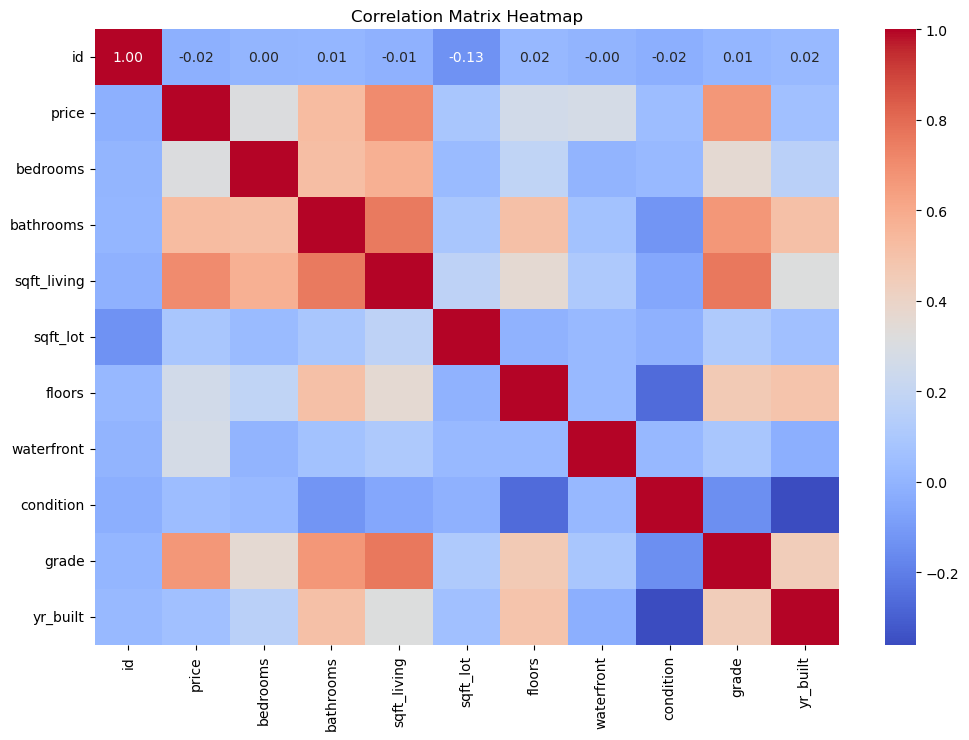

In [17]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

### **d. Distribution of House Prices**

c:\Users\bijou\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


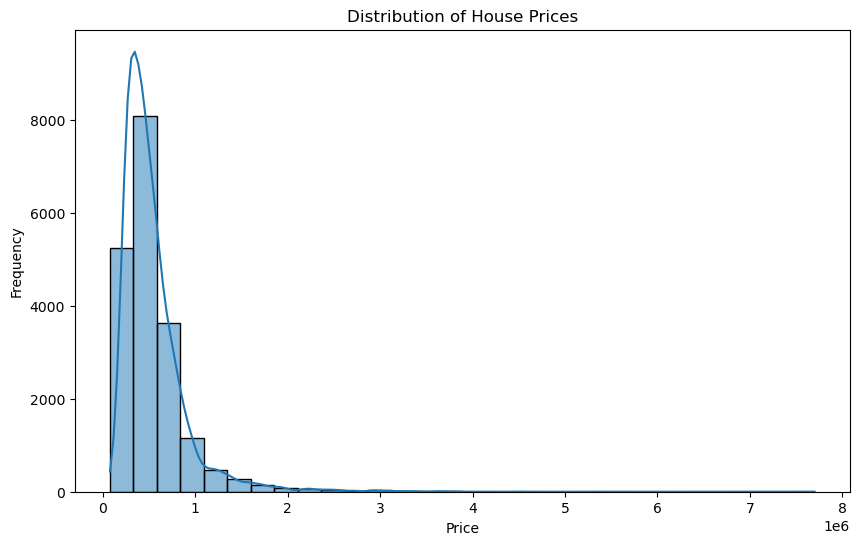

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### **e. Relationship Between Features and House Prices**

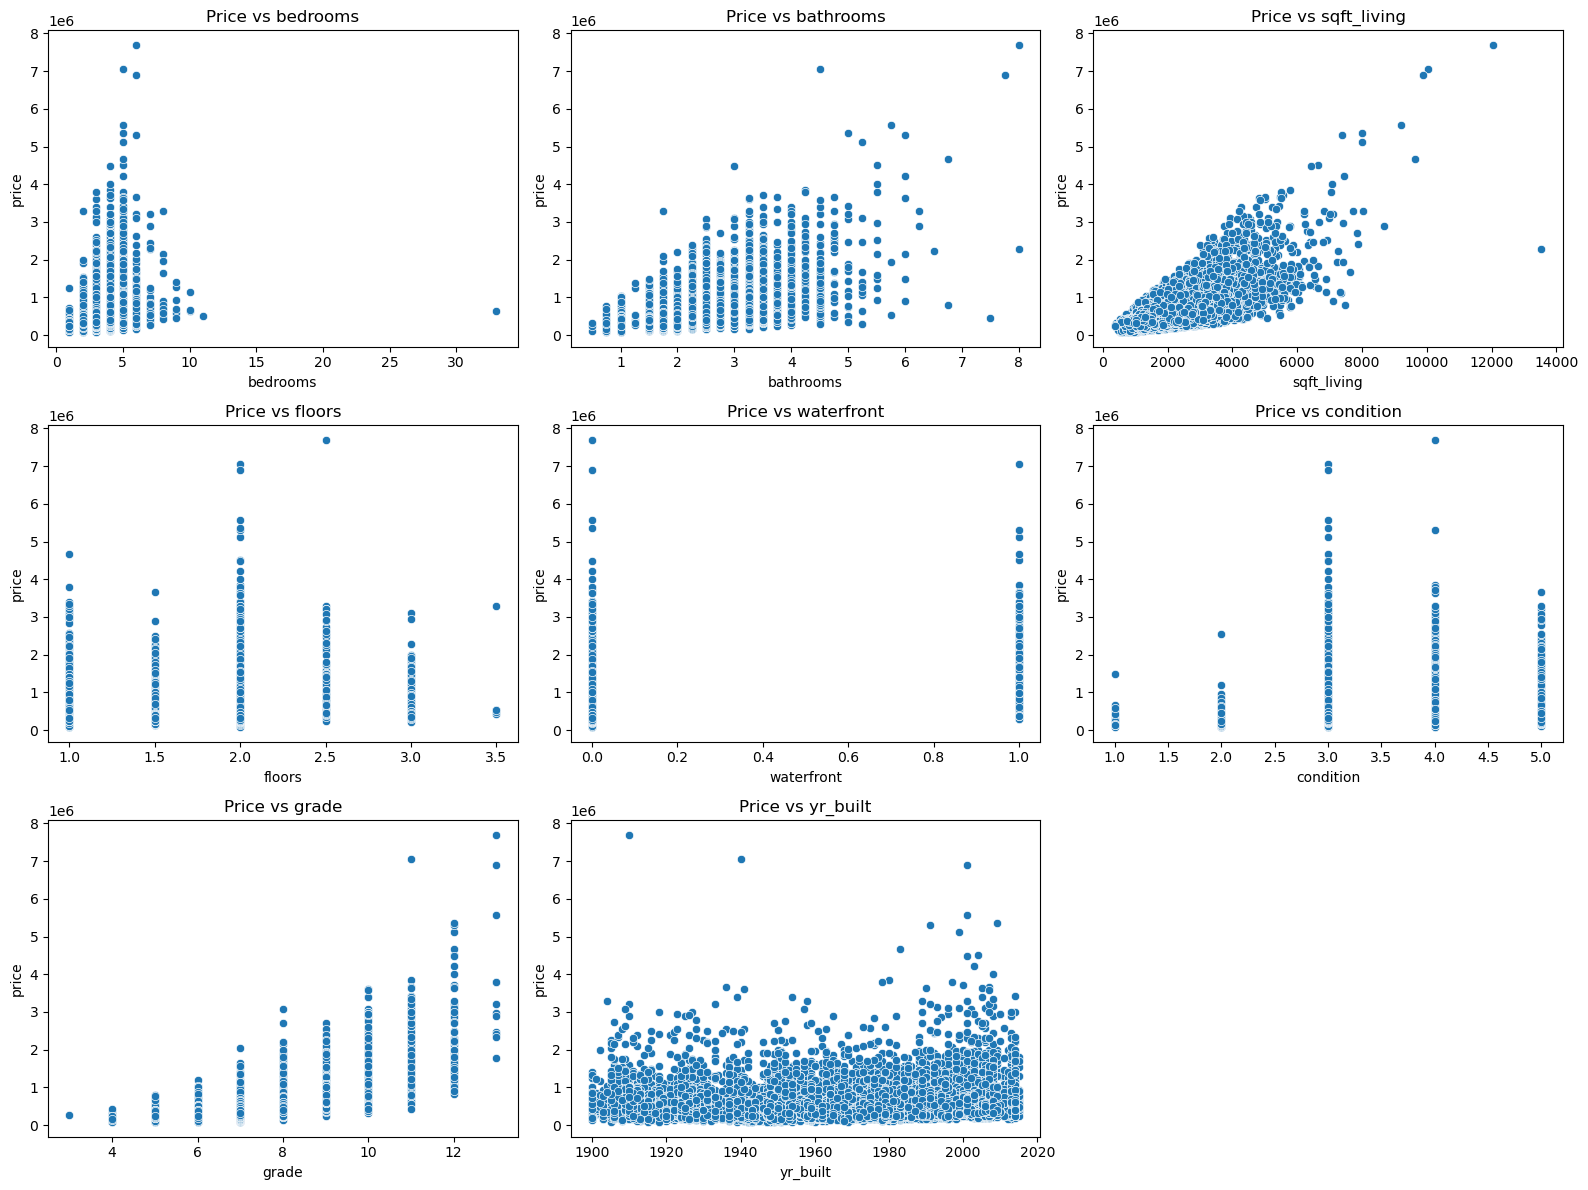

In [19]:
# Scatter plots to explore relationships between features and house prices
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()

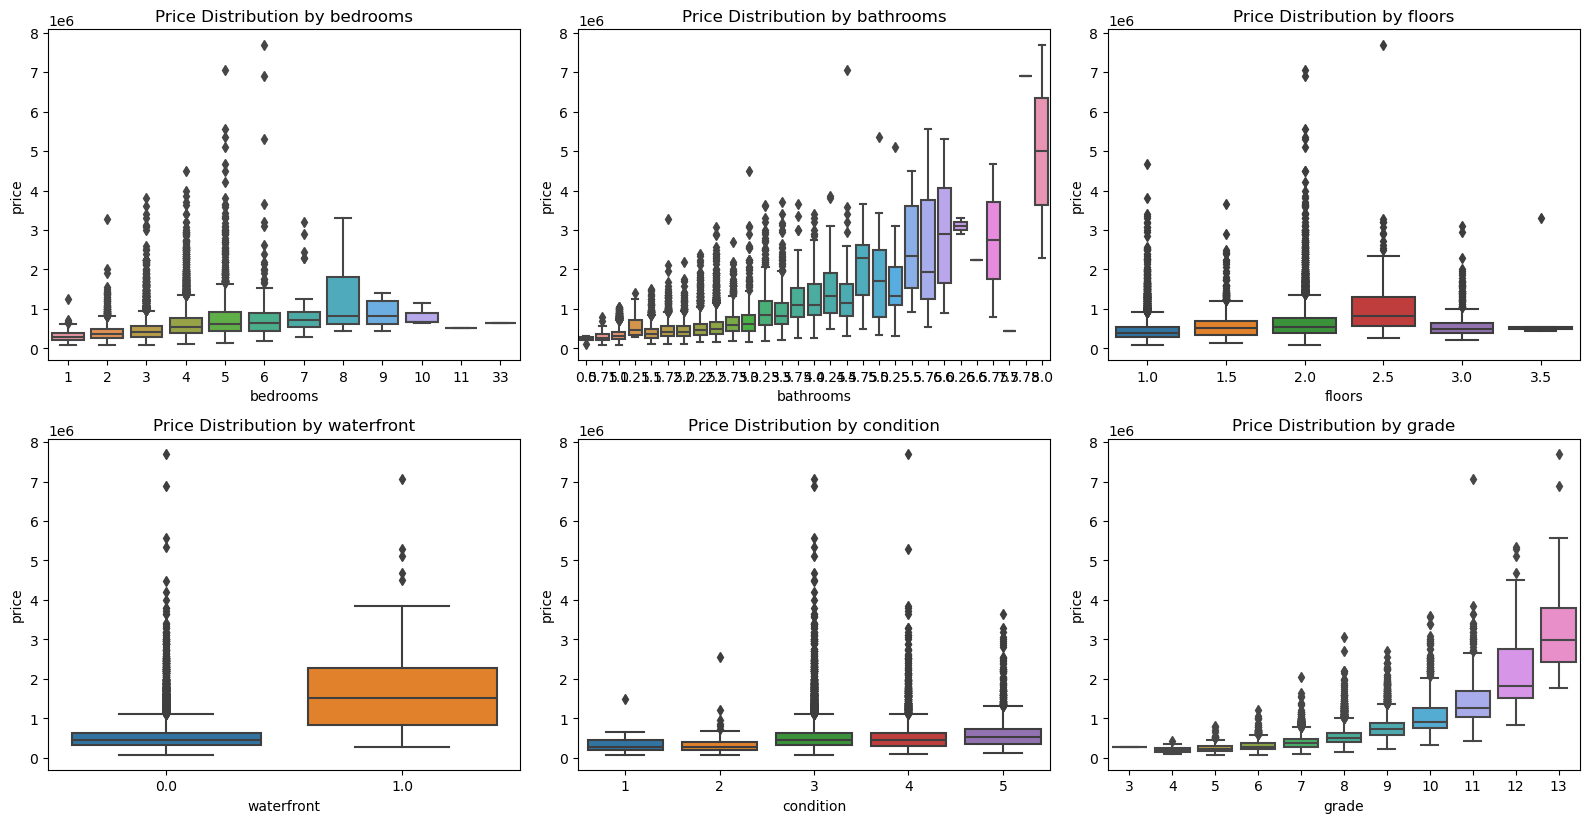

In [20]:
# Box plots to compare price distributions based on categorical features
categorical_features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'Price Distribution by {feature}')
plt.tight_layout()
plt.show()

### **f. Impact of Home Renovations on Price**

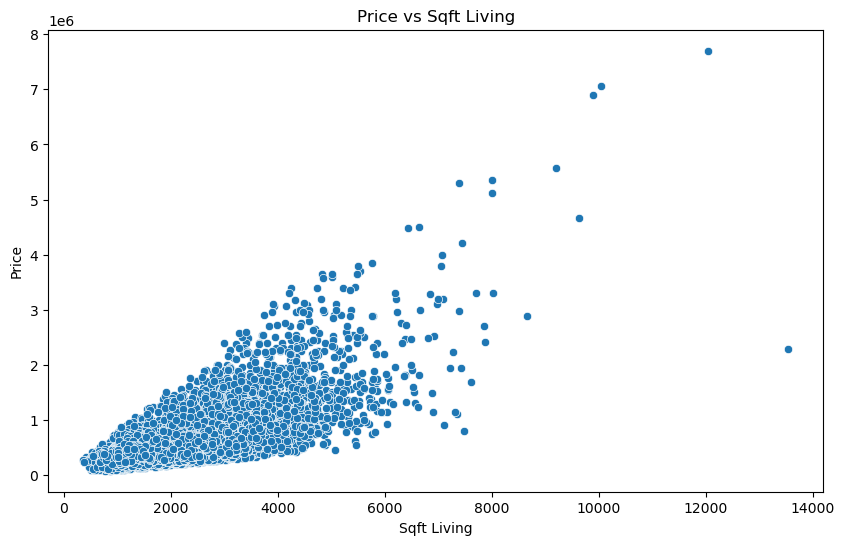

In [21]:
# Analyzing the impact of home renovations
# We'll consider 'sqft_living' as a proxy for home renovations (increase in living space)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Price vs Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

### **g. Impact of House Condition on Price**

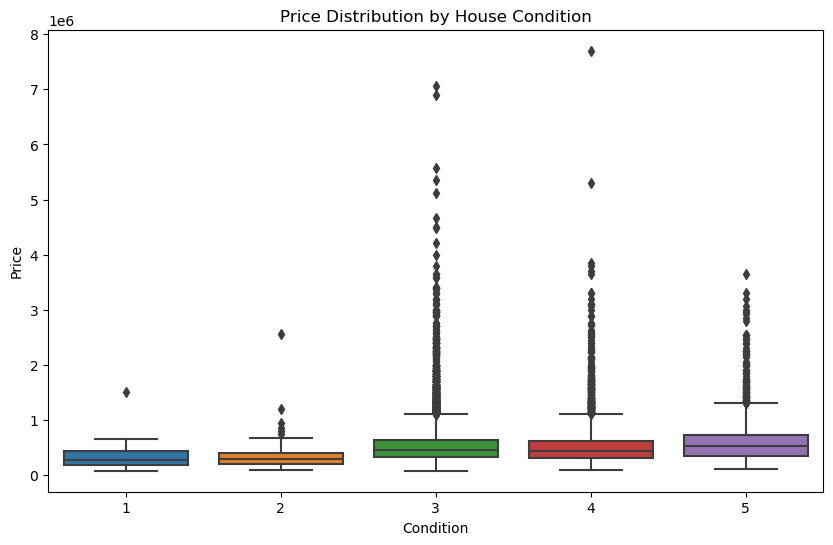

In [22]:
# Analyzing the impact of house condition on price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='condition', y='price')
plt.title('Price Distribution by House Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

### **h. Impact of House Grade on Price***

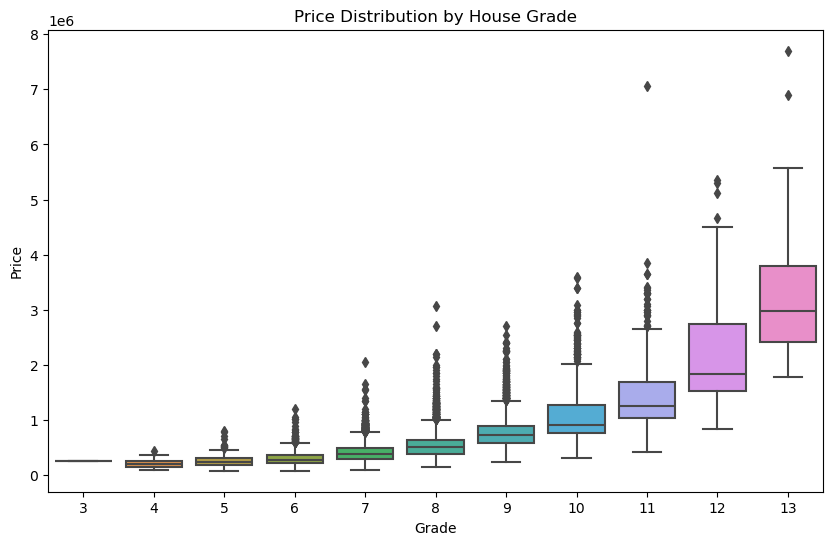

In [23]:
# Analyzing the impact of house grade on price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='grade', y='price')
plt.title('Price Distribution by House Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()